In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import os, sys

In [3]:
path = "C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\ Deep learning project subject classification\\Subject\\Eng\\"
dirs = os.listdir(path)
for item in dirs:
    if os.path.isfile(path+item):
        im=Image.open(path+item).convert('RGB')#Converting all the images to jpg
        f, e = os.path.splitext(path+item)
        imResize = im.resize((256,256), Image.ANTIALIAS)#Reshape
        print(imResize.mode)
        imResize.save(f+'.jpg','JPEG',quality = 95)

RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB


In [4]:
IMAGE_SIZE=255
BATCH_SIZE=5

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\ Deep learning project subject classification\\Subject\\"
,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 109 files belonging to 2 classes.


In [6]:
class_names=dataset.class_names
class_names

['Eng', 'Math']

In [7]:
len(dataset)

22

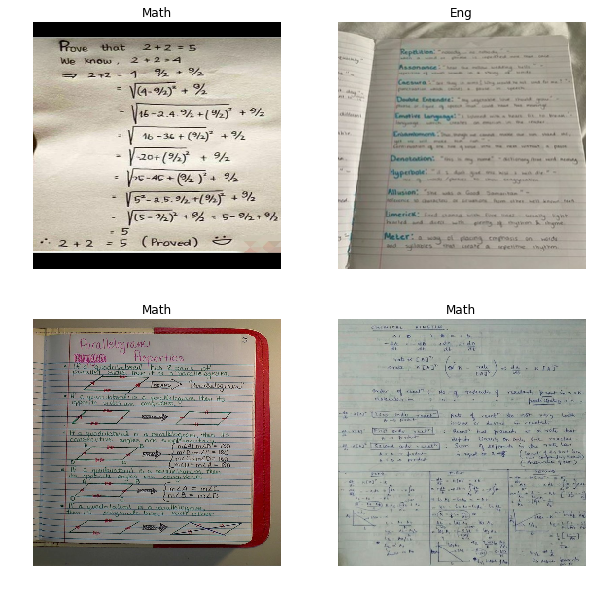

In [8]:
plt.figure(figsize=(10,10))
for i in range(4):
    for image_batch, label_batch in dataset.take(1):
        #print(image_batch.shape)
        #print(label_batch.numpy())
        #print(image_batch[0])
        #print(image_batch[0].numpy())
        ax=plt.subplot(2,2,i+1)
        plt.imshow(image_batch[0].numpy().astype('int64'))#it is float so we converted it to int by astype unint
        plt.title(class_names[label_batch[0]])
        plt.axis('off')

In [9]:
#80%==>training
#20%==>10% validation,10% test

In [10]:
train_size=0.8
len(dataset)*train_size

17.6

In [11]:
train_ds=dataset.take(30)
len(train_ds)

22

In [12]:
test_ds=dataset.skip(30)
len(test_ds)

0

In [13]:
val_size=0.1
len(dataset)*val_size

2.2

In [14]:
val_ds=test_ds.take(3)
len(val_ds)

0

In [15]:
test_ds=test_ds.skip(3)

In [16]:
def get_dataset_partitions_tf(df,train_split=0.8,val_split=0.1,shuffle=True,Shuffle_size=100):
    train_size=0.8
    if shuffle:
        df=df.shuffle(Shuffle_size,seed=12)#seed for predictibility
    train_ds=dataset.take(int(len(dataset)*train_size))
    test_ds=dataset.skip(int(len(dataset)*train_size))
    val_size=0.1
    val_ds=test_ds.take(int(len(dataset)*val_size))
    test_ds=test_ds.skip(int(len(dataset)*val_size))
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds,=get_dataset_partitions_tf(dataset)
len(train_ds)

17

In [18]:
len(val_ds)

2

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)#Deep Learning Tutorial 44

In [20]:
test_ds

<PrefetchDataset shapes: ((None, 255, 255, 3), (None,)), types: (tf.float32, tf.int32)>

In [21]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (5, 255, 255, 3)          0         
_________________________________________________________________
sequential_1 (Sequential)    (5, 255, 255, 3)          0         
_________________________________________________________________
conv2d (Conv2D)              (5, 253, 253, 32)         896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (5, 126, 126, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (5, 124, 124, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (5, 62, 62, 64)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (5, 60, 60, 64)          

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=45,
)

Epoch 1/45
17/17 [==============================] - 14s 695ms/step - loss: 0.7001 - accuracy: 0.5176 - val_loss: 0.6873 - val_accuracy: 0.6000
Epoch 2/45
17/17 [==============================] - 10s 598ms/step - loss: 0.6958 - accuracy: 0.5294 - val_loss: 0.6721 - val_accuracy: 0.6000
Epoch 3/45
17/17 [==============================] - 10s 591ms/step - loss: 0.6922 - accuracy: 0.5294 - val_loss: 0.6758 - val_accuracy: 0.6000
Epoch 4/45
17/17 [==============================] - 10s 591ms/step - loss: 0.6871 - accuracy: 0.5294 - val_loss: 0.6302 - val_accuracy: 0.6000
Epoch 5/45
17/17 [==============================] - 10s 600ms/step - loss: 0.6766 - accuracy: 0.4941 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 6/45
17/17 [==============================] - 10s 583ms/step - loss: 0.6944 - accuracy: 0.5176 - val_loss: 0.6884 - val_accuracy: 0.6000
Epoch 7/45
17/17 [==============================] - 10s 586ms/step - loss: 0.6925 - accuracy: 0.5294 - val_loss: 0.6876 - val_accuracy: 0.6000

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

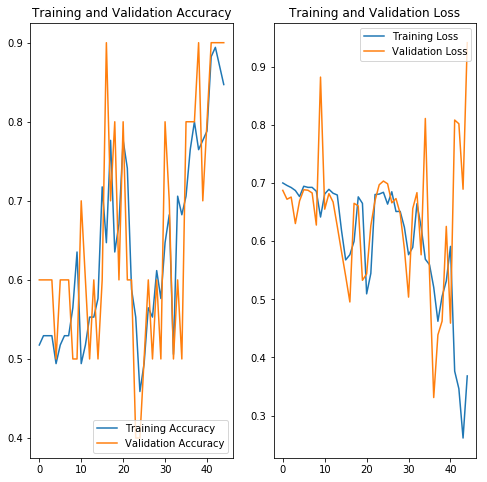

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(45), acc, label='Training Accuracy')
plt.plot(range(45), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(45), loss, label='Training Loss')
plt.plot(range(45), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Math
[4.9471787e-06 9.9999499e-01]
predicted label: Math


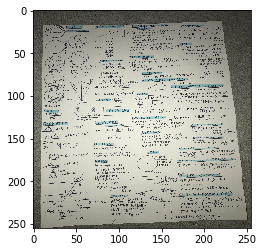

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])

    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())#we converted image to a image array
    img_array = tf.expand_dims(img_array, 0)#the model takes image in batches so we have created the batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

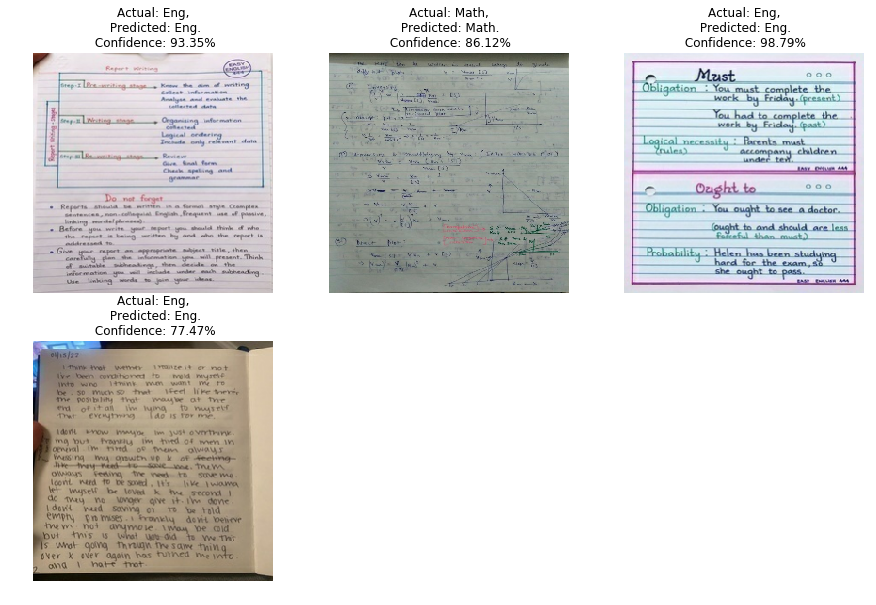

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [34]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


In [35]:
folder='Math'
path='C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\ Deep learning project subject classification\\Subject\\'+folder+'\\'
dirs = os.listdir(path)
for items in dirs:
    print(items)

024f0dab2ca92208159f8edec70b27f5.jpg
033663da3ecdf8a3a9d4dd1b6ef0016d.jpg
09be8c92df9aa1050483e97f96bf98df.jpg
0a2e4c7bccba524f6bb651d170180fab.jpg
191863c0ad69e1b7ebc75e296ea10cb4.jpg
2c833dcdd61c82b767ffb885a7e369e1.jpg
302633499085f75dd634cdbbe3fba3ad (1).jpg
302633499085f75dd634cdbbe3fba3ad.jpg
308b022462ff3f2832128aee0864babf.jpg
3453131da0264e48b0e79c53c15e4d30.jpg
3bf23065809f6fb6814adc278512631a.jpg
53481cc70b61a290b3a461d869e5a12e.jpg
538ae690a60c7bfb1522ba23a4d2264b.jpg
5b21d93038002cacdd395075d25ff16b.jpg
5c6820ae70bb059eadbcf5de1986c16a.jpg
5e6ff051df4c1db25f2ae8cdc4b1dded.jpg
6c6b4688535621bbbaf13ca062da419f.jpg
73ce9ac23fc2fc34ffc1dad2f87ed16e.jpg
74a2343b2ba25bd54a99646fe76f0ba0.jpg
781ef1185b9d1570b22a17f253e1e4fa.jpg
799d134dad4c0c7c36acf4919498d327.jpg
7c612cbe7e5678842981967f077bae97.jpg
84daae4c02fbc9947d346b35197712b8.jpg
8601fd8d0e26218a5b6ebccbb548b3ac.jpg
8699d24649755bbd14f6c3cc0c8024a3.jpg
873eb623c182388acc1bee70f3dc2372.jpg
8b17daeb82d6099dd156a40770ca0d5d.j

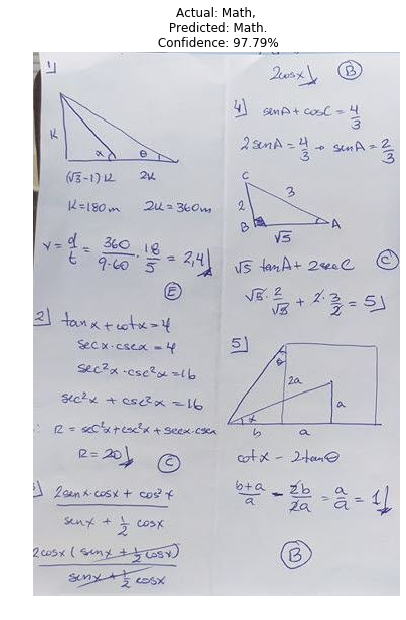

In [36]:
plt.figure(figsize=(10,10))
folder='Math'
image=plt.imread('C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\ Deep learning project subject classification\\Subject\\'+folder+'\\9ea38c18b418eeeea26926d4957262ae.jpg')
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
plt.imshow(image)
plt.title(f"Actual: {folder},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.axis("off")
plt.show()

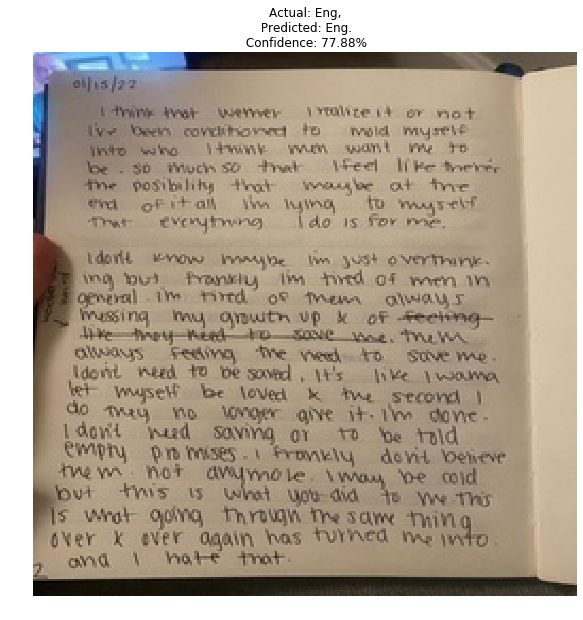

In [37]:
plt.figure(figsize=(10,10))
folder='Eng'
image=plt.imread('C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\ Deep learning project subject classification\\Subject\\'+folder+'\\9c69bf9489906a87c33ab0cce4961a92.jpg')
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
plt.imshow(image)
plt.title(f"Actual: {folder},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.axis("off")
plt.show()

In [ ]:
#https://www.pinterest.com/pin/18999629671715679/